# Chapter 5: In-Chapter Code

#### section 5.2

##### 5.2.1

In [1]:
import torch
import numpy as np

In [2]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

In [3]:
import matplotlib.pyplot as plt

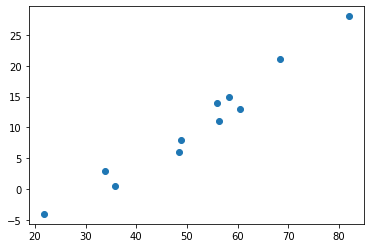

In [4]:
plt.scatter(x=t_u,y=t_c)

In [5]:
def model(t_u, w, b):
    return w * t_u + b

In [6]:
def loss_fn(t_p, t_c):
    """
    take the mean of all the squared difference, i.e. mean squared error
    
    t_p = prediction
    t_c = target / ground truth
    """
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [7]:
# one simple instance
w = torch.ones(()) # these are both scalars, i.e. zero dimesion tensors
b = torch.zeros(()) #

In [8]:
w

tensor(1.)

In [9]:
w.shape

torch.Size([])

In [10]:
# make a prediction
t_p = model(t_u, w, b)
t_p

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])

In [11]:
loss = loss_fn(t_p, t_c)
loss

tensor(1763.8846)

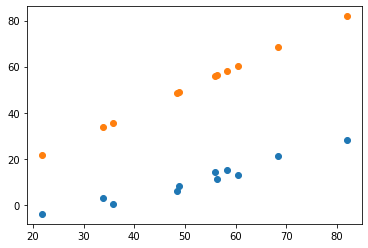

In [12]:
plt.scatter(x=t_u, y=t_c)
plt.scatter(x=t_u, y=t_p)

In [13]:
# calculate rate of change

delta = 0.1

# loss change in w
loss_rate_of_change_w = \
 (loss_fn(model(t_u, w+delta, b), t_c) - 
  loss_fn(model(t_u, w-delta, b), t_c)) / (2.0 * delta)
loss_rate_of_change_w

tensor(4517.2979)

In [14]:
learning_rate = 1e-2

In [15]:
# update our w, which is changed by a scaled version of the loss in w
w = w - learning_rate * loss_rate_of_change_w
w

tensor(-44.1730)

In [16]:
# do the same for b
loss_rate_of_chnage_b = \
 (loss_fn(model(t_u, w, b + delta), t_c) - 
 loss_fn(model(t_u, w, b - delta), t_c)) / (2.0* delta)
loss_rate_of_chnage_b

tensor(-4602.5000)

In [17]:
b = b - learning_rate * loss_rate_of_chnage_b
b

tensor(46.0250)

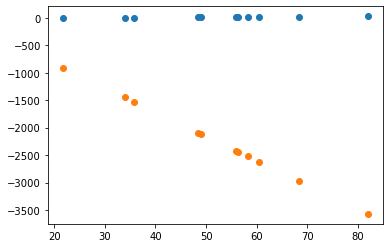

In [18]:
plt.scatter(x=t_u, y=t_c)
plt.scatter(x=t_u, y=model(t_u, w, b))

In [19]:
# need a function for the gradient
def dloss_fn(t_p, t_c):
    dsq_diffs = 2 * (t_p - t_c) / t_p.size(0)
    return dsq_diffs

In [20]:
# model derivative by w
def dmodel_dw(t_u, w, b):
    return t_u

# model derivative by b
def dmodel_db(t_u, w, b):
    return 1.0

In [21]:
# the gradient: 
def grad_fn(t_u, t_p, w, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w, b)
    return torch.stack([dloss_dw.sum(), dloss_db.sum()]) # by taking the sum we are reducing the error to a single value each of w and b

In [22]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(n_epochs+1):
        w, b = params # unpack
        t_p = model(t_u, w, b) # get prediction
        # get loss
        loss = loss_fn(t_p, t_c)
        # get updates via gradient
        grad = grad_fn(t_u, t_p, w, b)
        # update w,b 
        params = params - learning_rate*grad
        print('epoch %d, loss %f' % (epoch, float(loss)))
    return params

In [23]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

In [24]:
training_loop( n_epochs=10, learning_rate=1e-2, params=torch.tensor([1.0, 0.0]), t_u = t_u, t_c=t_c)

epoch 0, loss 1763.884644
epoch 1, loss 5802485.500000
epoch 2, loss 19408035840.000000
epoch 3, loss 64915909902336.000000
epoch 4, loss 217130559820791808.000000
epoch 5, loss 726257583152928129024.000000
epoch 6, loss 2429183992928415200051200.000000
epoch 7, loss 8125126681682403942989824000.000000
epoch 8, loss 27176891792249147543971428302848.000000
epoch 9, loss 90901154706620645225508955521810432.000000
epoch 10, loss inf


tensor([-1.8590e+19, -3.2746e+17])

In [25]:
# whoa! that did not converge!

In [26]:
training_loop( n_epochs=10, learning_rate=1e-4, params=torch.tensor([1.0, 0.0]), t_u = t_u, t_c=t_c)

epoch 0, loss 1763.884644
epoch 1, loss 323.090546
epoch 2, loss 78.929634
epoch 3, loss 37.552845
epoch 4, loss 30.540285
epoch 5, loss 29.351152
epoch 6, loss 29.148882
epoch 7, loss 29.113848
epoch 8, loss 29.107145
epoch 9, loss 29.105242
epoch 10, loss 29.104168


tensor([ 0.2323, -0.0169])

In [27]:
# great! that is trending downwards

In [28]:
def training_loop_graph(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(n_epochs+1):
        plt.scatter(x=t_u, y=t_c,color='red',label='truth')
        w, b = params # unpack
        t_p = model(t_u, w, b) # get prediction
        # get loss
        loss = loss_fn(t_p, t_c)
        # get updates via gradient
        grad = grad_fn(t_u, t_p, w, b)
        # update w,b 
        params = params - learning_rate*grad
        print('epoch %d, loss %f' % (epoch, float(loss)))
        plt.scatter(x=t_u, y=t_p, color='blue', label='prediction')

        if n_epochs % 5:
            display(plt.show())
    return params

epoch 0, loss 1763.884644
epoch 1, loss 323.090546
epoch 2, loss 78.929634
epoch 3, loss 37.552845
epoch 4, loss 30.540285
epoch 5, loss 29.351152
epoch 6, loss 29.148882
epoch 7, loss 29.113848
epoch 8, loss 29.107145
epoch 9, loss 29.105242
epoch 10, loss 29.104168
epoch 11, loss 29.103222
epoch 12, loss 29.102297
epoch 13, loss 29.101379
epoch 14, loss 29.100470
epoch 15, loss 29.099548
epoch 16, loss 29.098631
epoch 17, loss 29.097715
epoch 18, loss 29.096796
epoch 19, loss 29.095884
epoch 20, loss 29.094959
epoch 21, loss 29.094049
epoch 22, loss 29.093134
epoch 23, loss 29.092213
epoch 24, loss 29.091297
epoch 25, loss 29.090382
epoch 26, loss 29.089460
epoch 27, loss 29.088549
epoch 28, loss 29.087635
epoch 29, loss 29.086718
epoch 30, loss 29.085808
epoch 31, loss 29.084888
epoch 32, loss 29.083965
epoch 33, loss 29.083057
epoch 34, loss 29.082142
epoch 35, loss 29.081219
epoch 36, loss 29.080309
epoch 37, loss 29.079393
epoch 38, loss 29.078474
epoch 39, loss 29.077559
epoch 4

tensor([ 0.2327, -0.0441])

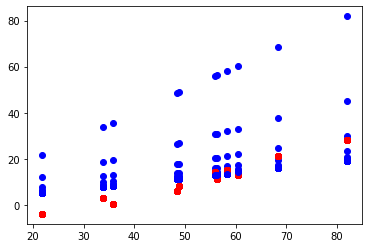

In [29]:
training_loop_graph( n_epochs=100, learning_rate=1e-4, params=torch.tensor([1.0, 0.0]), t_u = t_u, t_c=t_c)

In [30]:
# the slope is changing quicker than the bias term, this is leading to the fit being off
# this is due to the weights and bias terms being improperly scaled 

In [31]:
# let's make the range on the inputs live in -1.0 to 1.0

In [32]:
t_c

tensor([ 0.5000, 14.0000, 15.0000, 28.0000, 11.0000,  8.0000,  3.0000, -4.0000,
         6.0000, 13.0000, 21.0000])

In [33]:
t_u

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])

In [34]:
t_unorm = t_u * 0.1
t_unorm

tensor([3.5700, 5.5900, 5.8200, 8.1900, 5.6300, 4.8900, 3.3900, 2.1800, 4.8400,
        6.0400, 6.8400])

In [35]:
# now they t_c and t_u(norm) are comparable 

epoch 0, loss 80.364342
epoch 1, loss 37.574917
epoch 2, loss 30.871077
epoch 3, loss 29.756193
epoch 4, loss 29.507149
epoch 5, loss 29.392458
epoch 6, loss 29.298828
epoch 7, loss 29.208717
epoch 8, loss 29.119417
epoch 9, loss 29.030487
epoch 10, loss 28.941875
epoch 11, loss 28.853565
epoch 12, loss 28.765556
epoch 13, loss 28.677851
epoch 14, loss 28.590431
epoch 15, loss 28.503321
epoch 16, loss 28.416496
epoch 17, loss 28.329975
epoch 18, loss 28.243738
epoch 19, loss 28.157801
epoch 20, loss 28.072151
epoch 21, loss 27.986799
epoch 22, loss 27.901731
epoch 23, loss 27.816954
epoch 24, loss 27.732460
epoch 25, loss 27.648256
epoch 26, loss 27.564342
epoch 27, loss 27.480711
epoch 28, loss 27.397358
epoch 29, loss 27.314295
epoch 30, loss 27.231512
epoch 31, loss 27.149006
epoch 32, loss 27.066790
epoch 33, loss 26.984844
epoch 34, loss 26.903173
epoch 35, loss 26.821791
epoch 36, loss 26.740675
epoch 37, loss 26.659838
epoch 38, loss 26.579279
epoch 39, loss 26.498987
epoch 40, 

tensor([ 2.7597, -2.5413])

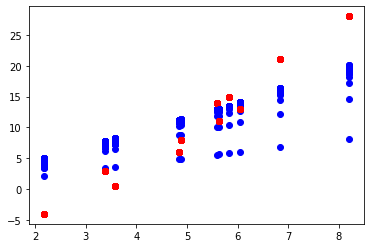

In [36]:
training_loop_graph( n_epochs=100, learning_rate=1e-2, params=torch.tensor([1.0, 0.0]), t_u = t_unorm, t_c=t_c) # we have set the learning rate back to 1e-2 and it was fine!

In [37]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c, print_params=True):
    for epoch in range(n_epochs+1):
        w, b = params # unpack
        t_p = model(t_u, w, b) # get prediction
        # get loss
        loss = loss_fn(t_p, t_c)
        # get updates via gradient
        grad = grad_fn(t_u, t_p, w, b)
        # update w,b 
        params = params - learning_rate*grad
        if print_params:
            print('epoch %d, loss %f' % (epoch, float(loss)))
    return params

In [38]:
params = training_loop(n_epochs=5000, learning_rate=1e-2, params=torch.tensor([1.0, 0.0]), t_u=t_unorm, t_c=t_c, print_params=False)

In [39]:
params

tensor([  5.3671, -17.3012])

In [40]:
t_p = model(t_unorm, *params) # get prediction

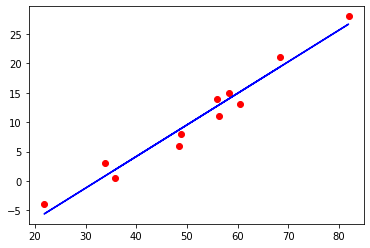

In [41]:
plt.scatter(t_u, t_c, color='red')
plt.plot(t_u, t_p, color='blue')

##### 5.5 AUTOGRAD


some house keeping, let's get all our basics here

In [42]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

In [43]:
t_unorm = t_u * 0.1
t_unorm

tensor([3.5700, 5.5900, 5.8200, 8.1900, 5.6300, 4.8900, 3.3900, 2.1800, 4.8400,
        6.0400, 6.8400])

In [44]:
def model(t_u, w, b):
    return w * t_u + b

In [45]:
def loss_fn(t_p, t_c):
    """
    take the mean of all the squared difference, i.e. mean squared error
    
    t_p = prediction
    t_c = target / ground truth
    """
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [46]:
# w, b in a single tensor
params = torch.tensor([1.0, 0.0], requires_grad=True) # update these using the autograd

In [47]:
params.grad is None # if true that means that no operations have taken place in the tensors family tree

True

In [48]:
loss = loss_fn(model(t_u, *params), t_c)
loss

tensor(1763.8846, grad_fn=<MeanBackward0>)

In [49]:
params.grad

In [50]:
loss.backward()

In [51]:
params

tensor([1., 0.], requires_grad=True)

In [52]:
params.grad

tensor([4517.2969,   82.6000])

In [53]:
# now the grad attribute of params is populated

In [54]:
# write the training loop
# IMPORTANT: remember to zero the gradient after each training loop
def training_ag(n_epochs, learning_rate, params, t_u, t_c, print_params=True):
    """
    """
    for epoch in range(1, n_epochs+1):
        # zero the gradient!
        if params.grad is not None:
            params.grad.zero_()
        
        # get values
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)
        
        # get gradient via .backward()
        loss.backward()
        
        # now params.grad has the gradients
        # we will use the no_grad() context manager to 
        # avoid adding computational edges to the graph
        with torch.no_grad():
            params -= learning_rate * params.grad # Works! 
            #params = params.detach() - (learning_rate*params.grad) # Doesn't Work!
        # print
        if epoch % 500 == 0:
            print('epoch %d, loss %f' % (epoch, float(loss)))
        
    return params

In [55]:
training_ag(5000, learning_rate=1e-2, params=torch.tensor([1.0, 0.0], requires_grad=True), t_u=t_unorm, t_c=t_c, print_params=True)

epoch 500, loss 7.860116
epoch 1000, loss 3.828538
epoch 1500, loss 3.092191
epoch 2000, loss 2.957697
epoch 2500, loss 2.933134
epoch 3000, loss 2.928648
epoch 3500, loss 2.927830
epoch 4000, loss 2.927679
epoch 4500, loss 2.927652
epoch 5000, loss 2.927647


tensor([  5.3671, -17.3012], requires_grad=True)

##### 5.5.2 Optimizers

In [56]:
import torch.optim as optim

In [57]:
params = torch.tensor([1.0, 0.0], requires_grad=True)

In [58]:
learning_rate = 1e-5

In [59]:
optimizer = optim.SGD([params], lr=learning_rate)

In [63]:
# update training with optimizer
def training_optim(n_epochs, optimizer, params, t_u, t_c, print_params=True):
    """
    """
    for epoch in range(1, n_epochs+1):
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)
        optimizer.zero_grad() # clear gradients
        loss.backward() # calculate gradient and propogate through network
        optimizer.step() # update all params
        
        if print_params==True and epoch % 500 == 0:
            print('epoch %d, loss %f' % (epoch, float(loss)))
    return params

In [64]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-1
optimimzer = optim.Adam([params], lr=learning_rate)

In [66]:
training_optim(n_epochs = 2000, optimizer=optimimzer, params=params, t_u=t_unorm, t_c=t_c)

epoch 500, loss 2.962302
epoch 1000, loss 2.927647
epoch 1500, loss 2.927646
epoch 2000, loss 2.927646


tensor([  5.3677, -17.3048], requires_grad=True)

##### 5.5.3 Shuffling Data

In [69]:
n_samples = t_u.shape[0]
n_samples # total data points

11

In [70]:
n_val = int(0.20 * n_samples)
n_val # save 20% of them for validation

2

In [72]:
shuffled_indices = torch.randperm(n_samples)
shuffled_indices # get a random list from 0 to n_samples

tensor([ 0,  6,  2,  4,  8, 10,  9,  3,  1,  5,  7])

In [73]:
train_indices = shuffled_indices[:-n_val]
train_indices

tensor([ 0,  6,  2,  4,  8, 10,  9,  3,  1])

In [74]:
valid_indices = shuffled_indices[-n_val:]
valid_indices

tensor([5, 7])

In [75]:
train_t_u = t_unorm[train_indices]
train_t_c = t_c[train_indices]

valid_t_u = t_unorm[valid_indices]
valid_t_c = t_c[valid_indices]

In [76]:
# update the training loop so that we now have training and validation

In [90]:
# update training with optimizer
def training_optim_train_val(n_epochs, optimizer, params, train_u, valid_u, train_c, valid_c, print_params=True):
    """
    """
    for epoch in range(1, n_epochs+1):
        train_p = model(train_u, *params)
        train_loss = loss_fn(train_p, train_c)
        
        val_p = model(valid_u, *params)
        val_loss = loss_fn(val_p, valid_c)
        
        optimizer.zero_grad() # clear gradients
        train_loss.backward() # calculate gradient and propogate through network
        optimizer.step() # update all params
        
        if print_params==True and epoch % 200 == 0:
            print('epoch %d, training loss %f, validation loss %f' % (epoch, float(train_loss), float(val_loss)))
    return params

In [95]:
params = torch.tensor([1.0, 0.1], requires_grad=True)
learning_rate = 1e-2
optimimzer = optim.SGD([params], lr=learning_rate)

In [96]:
training_optim_train_val(5000, optimizer=optimimzer, params=params, train_u=train_t_u, valid_u=valid_t_u, train_c=train_t_c, valid_c=valid_t_c)

epoch 200, training loss 17.066727, validation loss 29.676231
epoch 400, training loss 11.755043, validation loss 15.983402
epoch 600, training loss 8.455937, validation loss 8.281689
epoch 800, training loss 6.406847, validation loss 4.130927
epoch 1000, training loss 5.134153, validation loss 2.051599
epoch 1200, training loss 4.343678, validation loss 1.153159
epoch 1400, training loss 3.852707, validation loss 0.904889
epoch 1600, training loss 3.547765, validation loss 0.994807
epoch 1800, training loss 3.358363, validation loss 1.243049
epoch 2000, training loss 3.240728, validation loss 1.548851
epoch 2200, training loss 3.167664, validation loss 1.858282
epoch 2400, training loss 3.122282, validation loss 2.144639
epoch 2600, training loss 3.094094, validation loss 2.396723
epoch 2800, training loss 3.076590, validation loss 2.611782
epoch 3000, training loss 3.065715, validation loss 2.791453
epoch 3200, training loss 3.058961, validation loss 2.939379
epoch 3400, training los

tensor([  5.6240, -18.7964], requires_grad=True)

In [97]:
model(t_unorm, *params)

tensor([ 1.2813, 12.6418, 13.9353, 27.2642, 12.8668,  8.7050,  0.2690, -6.5360,
         8.4238, 15.1726, 19.6718], grad_fn=<AddBackward0>)

In [98]:
t_c

tensor([ 0.5000, 14.0000, 15.0000, 28.0000, 11.0000,  8.0000,  3.0000, -4.0000,
         6.0000, 13.0000, 21.0000])